# Burçak Kalmuk HW4

## Discover the data

In [43]:
import os
import pandas as pd
import numpy as np
import re
import csv
from decimal import Decimal
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

path = os.path.expanduser("~/Desktop/HW4/")

In [44]:
movie_titles = open(path+"movie_titles.txt", "r")
movie_titles

<_io.TextIOWrapper name='/Users/burcakkalmuk/Desktop/HW4/movie_titles.txt' mode='r' encoding='UTF-8'>

In [45]:
movie_titles_lines = movie_titles.readlines()
movie_titles_lines

['2000,Miss Congeniality\n',
 '1996,Independence Day\n',
 '2000,The Patriot\n',
 '2004,The Day After Tomorrow\n',
 '2003,Pirates of the Caribbean: The Curse of the Black Pearl\n',
 '1990,Pretty Woman\n',
 '1994,Forrest Gump\n',
 '1999,The Green Mile\n',
 '1997,Con Air\n',
 '1996,Twister\n',
 '2002,Sweet Home Alabama\n',
 '2001,Pearl Harbor\n',
 '1998,Armageddon\n',
 '1996,The Rock\n',
 '2000,What Women Want\n',
 '2003,Bruce Almighty\n',
 "2001,Ocean's Eleven\n",
 '2002,The Bourne Identity\n',
 '2003,The Italian Job\n',
 '2004,I, Robot\n',
 '1999,American Beauty\n',
 '2003,How to Lose a Guy in 10 Days\n',
 '1998,Lethal Weapon 4\n',
 '2004,Shrek 2\n',
 '2003,Lost in Translation\n',
 '1986,Top Gun\n',
 '1994,Pulp Fiction\n',
 '2000,Gone in 60 Seconds\n',
 '1999,The Sixth Sense\n',
 '2002,Lord of the Rings: The Two Towers\n',
 '2000,Men of Honor\n',
 '2000,Gladiator\n',
 '2001,Lord of the Rings: The Fellowship of the Ring\n',
 '1992,Sister Act\n',
 '1999,Double Jeopardy\n',
 '2002,Two Week

In [46]:
len(movie_titles_lines)

100

In [47]:
only_titles = []
for i in movie_titles_lines:
    only_titles.append(re.split( "\n", re.split( ",", i )[1] )[0])
only_titles

['Miss Congeniality',
 'Independence Day',
 'The Patriot',
 'The Day After Tomorrow',
 'Pirates of the Caribbean: The Curse of the Black Pearl',
 'Pretty Woman',
 'Forrest Gump',
 'The Green Mile',
 'Con Air',
 'Twister',
 'Sweet Home Alabama',
 'Pearl Harbor',
 'Armageddon',
 'The Rock',
 'What Women Want',
 'Bruce Almighty',
 "Ocean's Eleven",
 'The Bourne Identity',
 'The Italian Job',
 'I',
 'American Beauty',
 'How to Lose a Guy in 10 Days',
 'Lethal Weapon 4',
 'Shrek 2',
 'Lost in Translation',
 'Top Gun',
 'Pulp Fiction',
 'Gone in 60 Seconds',
 'The Sixth Sense',
 'Lord of the Rings: The Two Towers',
 'Men of Honor',
 'Gladiator',
 'Lord of the Rings: The Fellowship of the Ring',
 'Sister Act',
 'Double Jeopardy',
 'Two Weeks Notice',
 'Troy',
 'The Royal Tenenbaums',
 'National Treasure',
 '50 First Dates',
 'Indiana Jones and the Last Crusade',
 'My Big Fat Greek Wedding',
 'Mystic River',
 'Titanic',
 'Dirty Dancing',
 'Catch Me If You Can',
 'Finding Nemo (Widescreen)',
 '

In [48]:
movie_ratings = np.loadtxt(path+"netflix_data.dat")
movie_ratings

array([[4., 4., 5., ..., 2., 5., 5.],
       [4., 4., 5., ..., 0., 1., 0.],
       [3., 4., 4., ..., 5., 0., 4.],
       ...,
       [1., 3., 4., ..., 3., 3., 4.],
       [1., 4., 1., ..., 3., 4., 4.],
       [5., 5., 5., ..., 4., 0., 4.]])

In [49]:
movie_ratings.shape

(5000, 100)

In [50]:
movie_ratings_table = pd.DataFrame(movie_ratings, columns = only_titles)
movie_ratings_table

,Miss Congeniality,Independence Day,The Patriot,The Day After Tomorrow,Pirates of the Caribbean: The Curse of the Black Pearl,Pretty Woman,Forrest Gump,The Green Mile,Con Air,Twister,...,Something's Gotta Give,Raiders of the Lost Ark,Anger Management,Sideways,Kill Bill: Vol. 2,American Pie,The Fast and the Furious,The School of Rock,Napoleon Dynamite,The Notebook
0,4.0,4.0,5.0,4.0,5.0,3.0,5.0,5.0,5.0,4.0,...,4.0,5.0,3.0,3.0,3.0,0.0,5.0,2.0,5.0,5.0
1,4.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,2.0,5.0,...,4.0,0.0,3.0,0.0,0.0,3.0,3.0,0.0,1.0,0.0
2,3.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,3.0,3.0,...,5.0,0.0,2.0,2.0,3.0,4.0,4.0,5.0,0.0,4.0
3,3.0,4.0,4.0,3.0,5.0,4.0,4.0,4.0,4.0,4.0,...,3.0,4.0,3.0,0.0,0.0,4.0,1.0,3.0,0.0,4.0
4,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,4.0,5.0,...,4.0,4.0,4.0,3.0,3.0,5.0,3.0,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3.0,4.0,4.0,4.0,5.0,4.0,5.0,5.0,2.0,3.0,...,4.0,5.0,3.0,0.0,4.0,0.0,3.0,4.0,0.0,0.0
4996,2.0,4.0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,4.0,...,0.0,5.0,0.0,5.0,0.0,0.0,4.0,4.0,5.0,0.0
4997,1.0,3.0,4.0,4.0,3.0,2.0,5.0,5.0,3.0,4.0,...,0.0,3.0,3.0,0.0,0.0,3.0,3.0,3.0,3.0,4.0
4998,1.0,4.0,1.0,4.0,5.0,3.0,4.0,3.0,1.0,1.0,...,0.0,3.0,0.0,0.0,4.0,4.0,1.0,3.0,4.0,4.0


## Prepare the data
### Mean values of each movie ratings are entered instead of "zero" values

In [28]:
movie_ratings_table.describe().loc[['mean']]

,Miss Congeniality,Independence Day,The Patriot,The Day After Tomorrow,Pirates of the Caribbean: The Curse of the Black Pearl,Pretty Woman,Forrest Gump,The Green Mile,Con Air,Twister,...,Something's Gotta Give,Raiders of the Lost Ark,Anger Management,Sideways,Kill Bill: Vol. 2,American Pie,The Fast and the Furious,The School of Rock,Napoleon Dynamite,The Notebook
mean,3.6204,4.1604,4.1228,3.7098,4.3496,4.0852,4.52,4.458,3.7514,3.7686,...,2.935,3.8404,2.6498,1.7022,2.4364,3.1018,2.792,2.5408,1.7526,2.8736


In [29]:
means_array = movie_ratings_table.describe().loc[['mean']].to_numpy()[0]
means_array

array([3.6204, 4.1604, 4.1228, 3.7098, 4.3496, 4.0852, 4.52  , 4.458 ,
       3.7514, 3.7686, 3.6892, 3.7438, 4.0244, 4.0234, 3.7094, 3.337 ,
       3.693 , 3.6728, 3.3832, 3.4652, 2.9746, 3.3244, 3.2618, 3.7262,
       1.7886, 3.7882, 3.0114, 3.3454, 4.1538, 3.9348, 3.4676, 4.0882,
       3.9444, 2.7622, 3.1292, 3.0622, 3.272 , 1.6996, 3.3536, 3.4358,
       3.9036, 3.2846, 2.9074, 3.631 , 3.3024, 3.2156, 3.8828, 3.81  ,
       2.6808, 2.9188, 4.0706, 3.517 , 2.9998, 2.9778, 3.3438, 3.0242,
       3.0664, 3.427 , 4.1352, 3.4956, 3.49  , 3.319 , 3.7988, 3.4002,
       3.3822, 2.7222, 2.9644, 3.5748, 3.855 , 3.4336, 3.6392, 3.767 ,
       3.6822, 2.2502, 2.8186, 3.3764, 2.591 , 2.9356, 3.2882, 2.488 ,
       3.4524, 2.9764, 2.511 , 2.6794, 2.8802, 3.4746, 3.4892, 3.1498,
       2.9108, 3.0692, 2.935 , 3.8404, 2.6498, 1.7022, 2.4364, 3.1018,
       2.792 , 2.5408, 1.7526, 2.8736])

In [30]:
for i in range(len(movie_ratings)):
    for j in range(len(movie_ratings[i])):
        if movie_ratings[i][j] == 0:
            movie_ratings[i][j] = means_array[j]

In [31]:
movie_ratings

array([[4.    , 4.    , 5.    , ..., 2.    , 5.    , 5.    ],
       [4.    , 4.    , 5.    , ..., 2.5408, 1.    , 2.8736],
       [3.    , 4.    , 4.    , ..., 5.    , 1.7526, 4.    ],
       ...,
       [1.    , 3.    , 4.    , ..., 3.    , 3.    , 4.    ],
       [1.    , 4.    , 1.    , ..., 3.    , 4.    , 4.    ],
       [5.    , 5.    , 5.    , ..., 4.    , 1.7526, 4.    ]])

In [32]:
movie_ratings_table = pd.DataFrame(movie_ratings, columns = only_titles)
movie_ratings_table

,Miss Congeniality,Independence Day,The Patriot,The Day After Tomorrow,Pirates of the Caribbean: The Curse of the Black Pearl,Pretty Woman,Forrest Gump,The Green Mile,Con Air,Twister,...,Something's Gotta Give,Raiders of the Lost Ark,Anger Management,Sideways,Kill Bill: Vol. 2,American Pie,The Fast and the Furious,The School of Rock,Napoleon Dynamite,The Notebook
0,4.0,4.0,5.0,4.0,5.0,3.0,5.0,5.0,5.0,4.0,...,4.000,5.0000,3.0000,3.0000,3.0000,3.1018,5.0,2.0000,5.0000,5.0000
1,4.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,2.0,5.0,...,4.000,3.8404,3.0000,1.7022,2.4364,3.0000,3.0,2.5408,1.0000,2.8736
2,3.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,3.0,3.0,...,5.000,3.8404,2.0000,2.0000,3.0000,4.0000,4.0,5.0000,1.7526,4.0000
3,3.0,4.0,4.0,3.0,5.0,4.0,4.0,4.0,4.0,4.0,...,3.000,4.0000,3.0000,1.7022,2.4364,4.0000,1.0,3.0000,1.7526,4.0000
4,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,4.0,5.0,...,4.000,4.0000,4.0000,3.0000,3.0000,5.0000,3.0,3.0000,3.0000,2.8736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3.0,4.0,4.0,4.0,5.0,4.0,5.0,5.0,2.0,3.0,...,4.000,5.0000,3.0000,1.7022,4.0000,3.1018,3.0,4.0000,1.7526,2.8736
4996,2.0,4.0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,4.0,...,2.935,5.0000,2.6498,5.0000,2.4364,3.1018,4.0,4.0000,5.0000,2.8736
4997,1.0,3.0,4.0,4.0,3.0,2.0,5.0,5.0,3.0,4.0,...,2.935,3.0000,3.0000,1.7022,2.4364,3.0000,3.0,3.0000,3.0000,4.0000
4998,1.0,4.0,1.0,4.0,5.0,3.0,4.0,3.0,1.0,1.0,...,2.935,3.0000,2.6498,1.7022,4.0000,4.0000,1.0,3.0000,4.0000,4.0000


# Clustering

Agglomerative Clustering implemented using Sklearn

In [ ]:
# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [35]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['C1', 'C2']

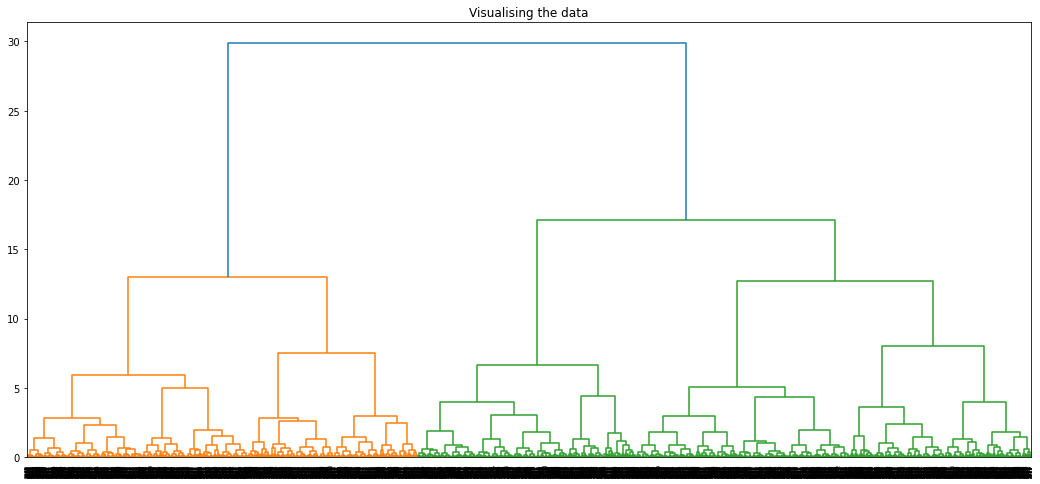

In [38]:
plt.figure(figsize =(18, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))


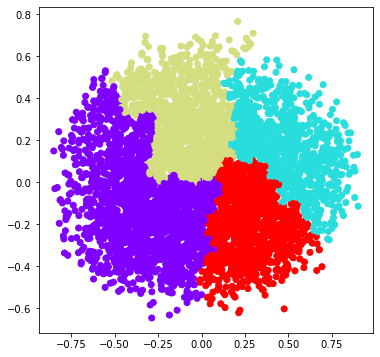

In [41]:
ac3 = AgglomerativeClustering(n_clusters = 4)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()